# Chuẩn bị dữ liệu

In [34]:
import numpy as np
import pandas as pd

# Đọc dữ liệu từ file CSV và tạo DataFrame
df = pd.read_csv("C:/Users/ADMIN/Downloads/spam.csv")

# In ra DataFrame
df = df.head(400)
df.head()






,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
# Chuyển thành dữ liệu số
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df['Message_length'] = df['Message'].apply(len)

# Dữ liệu huấn luyện
X_train = df['Message_length'].values.reshape(-1, 1)  # Chuyển đổi thành mảng NumPy và reshape thành cột
y_train = df['Spam'].values * 2 - 1  # Chuyển đổi nhãn từ {0, 1} thành {-1, 1}

# Thêm cột bias vào X_train
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Khởi tạo trọng số
w = np.zeros(X_train.shape[1])

# Thiết lập các siêu tham số
lambda_val = 0.1
alpha = 0.01
num_iters = 1000


# Xây dựng hàm mục tiêu: Định nghĩa hàm Hinge loss

In [36]:
# Hàm Hinge loss
def hinge_loss(w, X, y, lambda_val):
    distances = 1 - y * np.dot(X, w)
    distances[distances < 0] = 0  # max(0, distance)
    hinge_loss = lambda_val / 2 * np.dot(w, w) + np.mean(distances)
    return hinge_loss



# Tìm kiếm siêu phẳng tối ưu (Gradient Descent): Sử dụng Gradient Descent để tối ưu hóa trọng số w.

In [37]:
# Gradient Descent để tối ưu hóa
for i in range(num_iters):
    distances = 1 - y_train * np.dot(X_train, w)
    dw = np.zeros(len(w))
    for ind, d in enumerate(distances):
        if max(0, d) == 0:
            di = w
        else:
            di = w - (lambda_val * y_train[ind] * X_train[ind])
        dw += di
    dw = dw/len(y_train)  # Trung bình gradient
    w = w - alpha * dw  # Cập nhật trọng số

print("Trọng số tối ưu:", w)


Trọng số tối ưu: [-0.03962013 -0.01297257]


In [38]:
# Hàm dự đoán
def predict(w, X):
    return np.sign(np.dot(X, w))

# Dự đoán trên dữ liệu huấn luyện
y_train_pred = predict(w, X_train)

# Độ chính xác trên tập huấn luyện
train_accuracy = np.mean(y_train == y_train_pred)
print("Độ chính xác trên tập huấn luyện:", train_accuracy)


Độ chính xác trên tập huấn luyện: 0.855


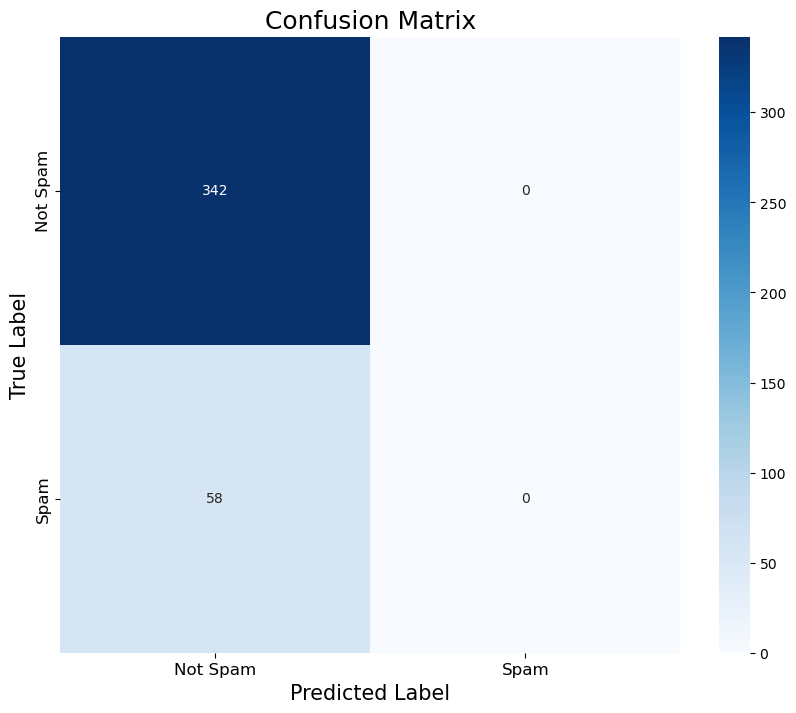

In [39]:
# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])

# Điều chỉnh các nhãn và tiêu đề
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)

# Điều chỉnh kích thước các nhãn trên trục x và y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()

# code bằng thư viện

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Đọc dữ liệu từ file CSV và tạo DataFrame
df = pd.read_csv("C:/Users/ADMIN/Downloads/spam.csv")


# In ra
df = df.head(500)

# Chuyển thành dữ liệu số
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df['Message_length'] = df['Message'].apply(len)



In [41]:
X = df['Message_length']
y = df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=  1  )
# Reshape dữ liệu huấn luyện và kiểm tra
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Khởi tạo mô hình SVM với kernel tuyến tính
svm_model = SVC(kernel='linear')

# Huấn luyện mô hình trên dữ liệu huấn luyện
svm_model.fit(X_train_reshaped, y_train)

# Dự đoán nhãn cho dữ liệu huấn luyện
y_pred_train = svm_model.predict(X_train_reshaped)

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Độ chính xác trên tập huấn luyện:", accuracy_train)

Độ chính xác trên tập huấn luyện: 0.8725


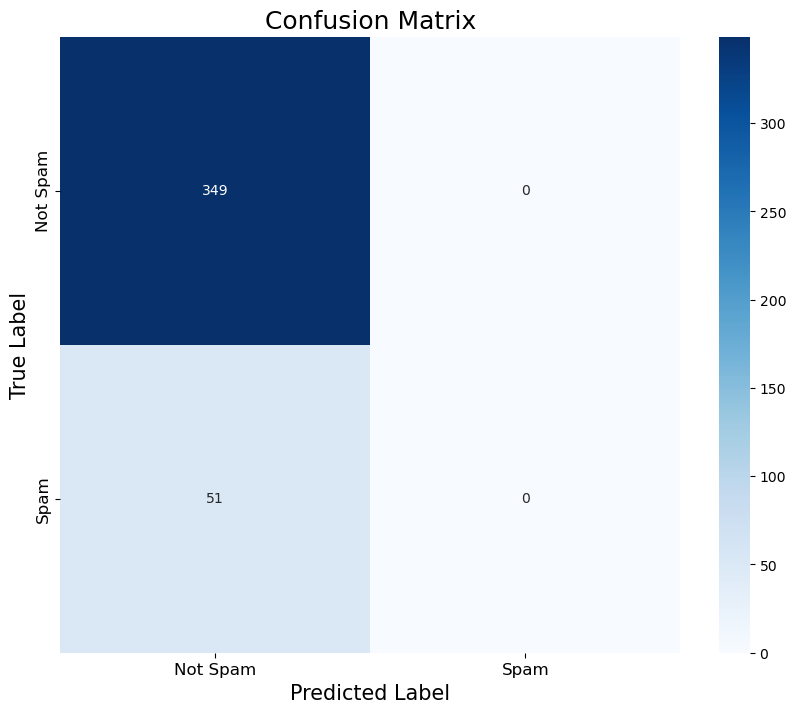

In [42]:
# Tính ma trận nhầm lẫn trên tập huấn luyện
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)

# Điều chỉnh kích thước các nhãn x và y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()